### Project 1, John Clark, W205 Section 9 - Increasing Ridership at Lyft Bay Wheels

In this project, I will peform an analysis to determine how to increase ridership at Lyft Bay Wheels. We begin this effort by making a number of SQL queries and performing some visualizations. 

### Iniitialize Libraries 

In [20]:
import pandas as pd


### SQL Queries

We start out with SQL queries asking three questions: 
* What is the size of this dataset? 
* What is the earliest start date and time and latest end date and time for a trip? 
* How many bikes are there: 
    
The following queries will answer thse questions

In [22]:
! bq query --use_legacy_sql=FALSE 'SELECT count(*) FROM `bigquery-public-data.san_francisco.bikeshare_trips`'

! bq query --use_legacy_sql=FALSE 'SELECT min(start_date), max(end_date), FROM `bigquery-public-data.san_francisco.bikeshare_trips`'

! bq query --use_legacy_sql=false 'select count(distinct(bike_number)) from `bigquery-public-data.san_francisco.bikeshare_trips`'


Waiting on bqjob_r59f98f92ef6d467b_00000179e7bf2e86_1 ... (0s) Current status: DONE   
+--------+
|  f0_   |
+--------+
| 983648 |
+--------+
Waiting on bqjob_reb13804f737e5f5_00000179e7bf362d_1 ... (0s) Current status: DONE   
+---------------------+---------------------+
|         f0_         |         f1_         |
+---------------------+---------------------+
| 2013-08-29 09:08:00 | 2016-08-31 23:48:00 |
+---------------------+---------------------+
Waiting on bqjob_r4dec8408492823d8_00000179e7bf3c02_1 ... (0s) Current status: DONE   
+-----+
| f0_ |
+-----+
| 700 |
+-----+


As we can see, the trips database has a total of 983,648 records in it. The earliest trip occurred on August 29th in 2013 and the latest trip occurred on August 31st of 2016.  Given total unique bike numbers, there appear to be 700 bikes. Let's consider an additional couple of SQL queries to answer the following question: 
* How many trips are in the morning vs. the afternoon? 

Let us assume the morning is defined between 6:00AM and 11:59AM and the afternoon is defined as between 12:00pm and 4:59PM.

In [23]:
! bq query --use_legacy_sql=false 'SELECT count(*)from `bigquery-public-data.san_francisco.bikeshare_trips` where extract(hour from end_date AT TIME ZONE "UTC") between 6 AND 11'
! bq query --use_legacy_sql=false 'SELECT count(*) from `bigquery-public-data.san_francisco.bikeshare_trips` where extract(hour from end_date AT TIME ZONE "UTC") between 12 AND 16'


Waiting on bqjob_r2ff41df03b20782f_00000179e7bf79e9_1 ... (0s) Current status: DONE   
+--------+
|  f0_   |
+--------+
| 387728 |
+--------+
Waiting on bqjob_r34d40c1bc1292087_00000179e7bf7fcd_1 ... (0s) Current status: DONE   
+--------+
|  f0_   |
+--------+
| 250705 |
+--------+


Our query tells us that there are 387,728 trips in the morning and 250,705 trips in the afternoon. 

Let us seek answers to some additional questions that tell us more about our dataset: 
* Is there any revenue leakage due to bicycles being unavailable? 
* What is the list of stations? 
* What are the most popular trips? 
* How many trips occur during peak rush hour times of 7:00PM to 9:59PM and 4:00PM to 6:59PM? 
* How many trips make use of a subscription vs. non subscription? 
* What is the distribution of trips across the different landmark locations (cities)? 
* What days of the week do people most frequently use the bikes?
* Is there any seasonality present in ridership that may impact when offers should occur? 

First, we look at the availability of bikes compared to the total number of bikes. 

In [24]:
! bq query --use_legacy_sql=false 'select count(*) FROM `bigquery-public-data.san_francisco.bikeshare_status` where bikes_available = 0'
! bq query --use_legacy_sql=false 'select count(*) FROM `bigquery-public-data.san_francisco.bikeshare_status`'


Waiting on bqjob_r29a1102294cea88d_00000179e7bff41e_1 ... (0s) Current status: DONE   
+--------+
|  f0_   |
+--------+
| 850830 |
+--------+
Waiting on bqjob_r3097225181f84444_00000179e7bffc2e_1 ... (0s) Current status: DONE   
+-----------+
|    f0_    |
+-----------+
| 107501619 |
+-----------+


We can see that 850,830 times, there have been zero bikes available at a station. However, when this is compared to the total number of status updates of 10,750,619, the number does not appear so large. In fact, there are no bikes avilable .0079% of the time or less than 1 percent. 

Let's look next at the list of stations so we have an idea geographically as to where they are. 

In [25]:
! bq query --use_legacy_sql=FALSE 'SELECT distinct station_id, name, landmark FROM `bigquery-public-data.san_francisco.bikeshare_stations` ORDER BY landmark'

Waiting on bqjob_r5001f16f17247d2c_00000179e7c02ee1_1 ... (0s) Current status: DONE   
+------------+-----------------------------------------------+---------------+
| station_id |                     name                      |   landmark    |
+------------+-----------------------------------------------+---------------+
|         32 | Castro Street and El Camino Real              | Mountain View |
|         27 | Mountain View City Hall                       | Mountain View |
|         33 | Charleston Park/ North Bayshore Area          | Mountain View |
|         30 | Middlefield Light Rail Station                | Mountain View |
|         31 | San Antonio Shopping Center                   | Mountain View |
|         29 | San Antonio Caltrain Station                  | Mountain View |
|         28 | Mountain View Caltrain Station                | Mountain View |
|         37 | Cowper at University                          | Palo Alto     |
|         35 | University and Emerson       

A majority of the stations are in San Francisco and San Jose but we also see stations in Mountain View, Redwood City and Palo Alto. Noteably, there are no stations in the East Bay. 

Let's now consider the most popular trips. 

In [ ]:
! bq query --use_legacy_sql=FALSE 'SELECT end_station_name, start_station_name, landmark, count(*) as trip_freq FROM `bigquery-public-data.san_francisco.bikeshare_trips` a INNER JOIN `bigquery-public-data.san_francisco.bikeshare_stations` b ON a.end_station_id BETWEEN b.station_id AND b.station_id GROUP BY landmark, end_station_name, start_station_name ORDER BY trip_freq DESC'


We can see that 96 of the 100 most popular trips terminate in San Francisco. Two terminate in Mountain View and two terminate in San Jose. 

Now let us look at how many trips occur at peak rush hour times of 7:00PM to 9:59PM and 4:00PM to 6:59PM. 

In [4]:
%%bigquery

SELECT count(*) from `bigquery-public-data.san_francisco.bikeshare_trips` 
where extract(hour from end_date AT TIME ZONE "UTC") between 7 AND 9


Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.02s/rows]


,f0_
0,288598


In [5]:
%%bigquery

SELECT count(*) from `bigquery-public-data.san_francisco.bikeshare_trips` 
where extract(hour from start_date AT TIME ZONE "UTC") between 16 AND 18      


Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.23s/rows]


,f0_
0,299626


There are 288,598 trips at the peak of morning rush hour and 299,626 during the peak of afternoon/early evening rush hour. These two numbers total to 60% of all the trips at Lyft Bay Wheels, therefore, targeting commuters appears to a good strategy of increasing sales volumes. 

Let us now look at the breakdown of subscribers based on their subscription type. 

In [30]:
! bq query --use_legacy_sql=false 'SELECT subscriber_type, count(subscriber_type) from `bigquery-public-data.san_francisco.bikeshare_trips` GROUP by subscriber_type'

Waiting on bqjob_r58e68c1cb16df251_00000179e7c4ef2d_1 ... (0s) Current status: DONE   
+-----------------+--------+
| subscriber_type |  f0_   |
+-----------------+--------+
| Customer        | 136809 |
| Subscriber      | 846839 |
+-----------------+--------+


Based on this query, we can determine that 846,839 of the rides are by subscribers and only 136,809 are one time customers or those with a three day pass. Unfortunately this information is not very granular to inform us as to which types of promotions have been in place in the past, nor how effective those particular promotions have been. 

#### What is the distribution of trips across the different landmark locations (cities)? 

Next, we'll load the joined trips and stations table into a panda data frame and report off that. This next magic command saves it into a Pandas data frame and then we plot the results. 

In [116]:
%%bigquery df

SELECT * FROM `bigquery-public-data.san_francisco.bikeshare_trips` a 
INNER JOIN `bigquery-public-data.san_francisco.bikeshare_stations` b 
ON a.end_station_id BETWEEN b.station_id AND b.station_id

Downloading: 100%|██████████| 983648/983648 [00:02<00:00, 466922.12rows/s] 


<AxesSubplot:>

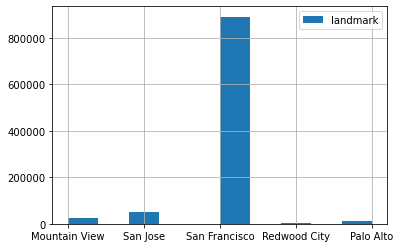

In [83]:
df.landmark.hist(legend = True)

That is an enormous amount of trips centered around San Francisco relative to other locations. 

#### Which days of the week are most popular? 

<AxesSubplot:>

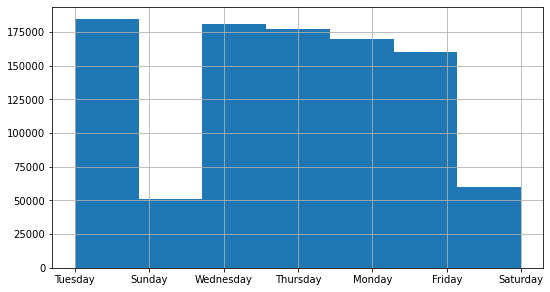

In [117]:
# Compute day of week and add to dataframe
df['day_of_week'] = df['start_date'].dt.day_name()

#Show histogram demonstrating most popular days
df.day_of_week.hist(bins = 7, figsize = [8.8, 4.8])

The weekdays appear to be the most popular by a large margin, consistent with a theory that bike rides are occuring during the week and for commuting. 

#### Weekday Trips by Month

In [128]:
#Sort values by day of week and start date
df.sort_values(["day_of_week", "start_date"])

#Drop weekends
indexNames = df[ (df['day_of_week'] == 'Saturday') | (df['day_of_week'] == 'Sunday') ].index
df.drop(indexNames , inplace=True)

len(df)

871994

array([[<AxesSubplot:title={'center':'start_date'}>]], dtype=object)

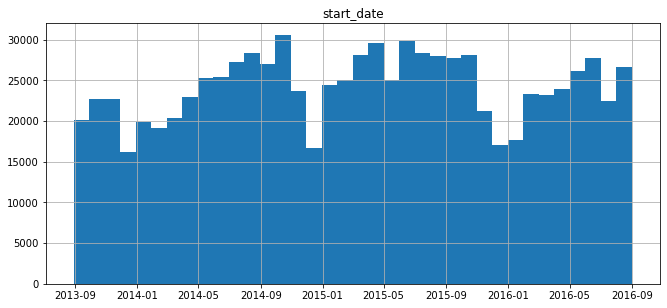

In [129]:
df.hist(column='start_date', bins = 36, figsize = [11,4.8])

Since we are focused on commuter offers, the weekends are removed from the dataframe and the resulting histogram of the trips shows a definite pattern of seasonality. The least popular months are in the middle of winter. Volume of rides appears to climb through the fall timeframe. This is likely due to the weather being colder and possibly additional rain during the winter. 

### Conclusion and Recommendations

#### Conclusions

It is clear from the data that an opportunity exists to target customers who are commuting to and from their jobs. There is a seasonality present in the ridership with certain months during the winter appearing as "down" months. In this analysis, we have identified the most popular trips, the busiest stations, the most important commuting windows, with weekdays being a priority and a high concentration of trips overall in San Francisco. Opportunities may exist to broaden the number of stations to certain locations that may be underserved inside or outside of San Francisco. There isn't sufficient granularity in the subscription data within the dataset and the lack of revenue data makes it somewhat difficult to evaluate which specific offers may be the most effective. Station real estate may be one of the most important assets currently held by the company and for that reason, I provide several recommendations related to those locations. 

#### Recommendations 

**Expand the use of the subscriber_type field to include more granular identification of the types of promotional campaigns, if any, that the rider is subscribing to.**   It is difficult to determine what promotional campaigns are working or not at the present moment because the data isn't in the dataset to evaluate which types of campaigns are providing the greatest return. It's further possible that a subscriber should participate in more than one program at the same time, which isn't possible to tell at the moment. Tracking this kind of information would provide more granular information on what campaigns are working and when. 

**Correlate revenue with trip data in order to enable stronger patterns to be discerned on potential opportunities.** Because this is a public dataset, it isn't surprising that the company did not provide revenue information. This information, if available could be used to correlate data from trips as well as the various promotional programs in order to best determine what types of offers may optimally increase revenue and improve customer service.

**Time promotional offers to occur in early spring.** Promotional offers should likely be timed to begin in early March as this is when the weather becomes more amenable to bicycle riding. Increasing ridership at this stage of the year may likely have benefits through the fall. 

**Target mobile ads to invidividuals close to Lyft bike stations.** We have geolocation information available to us for each of the stations. In addition, mobile ad targeting can also identify individuals what live close to those stations. It is recommended to correlate these two sets of information and partnering with Google and with other data aggregators or advertisers, to structure an advertisement campaign targeted at these individuals.

**Expand into other markets oudside San Francisco.** Based on the statistics, it seems apparent that there may be a large number of additional opportunities outside of the San Francisco area that may provide an opportunity for additional ridership, especially including locations near the Bay Area Rapid Transit (BART) train stations in the East Bay, areas around Oakland and surrounding communities, and other areas with a high concentration of employers. Riders in these communities could be enticed through bike stations close to or colocated with Bart Stations and advertising done on BART Trains. BART offers a number of advertising opportunities: https://www.bart.gov/about/business/advertising. 

**Consider expanding stations to ferry locations in the Bay Area.** To avoid the gridlock, Bay Area residents traveling into San Francisco are increasingly using ferries. In order of priority, I would consider adding stations at Larkspur (3,048,733 trips in 2019), Alameda/Oakland (1,384,300 trips in 2019) and Vallejo (1,081,665 trips in 2019). 

**Launch a campaign targeted at increasing the number of corporate memberships with locations that are near bike stations and BART stations.** Corporate memberships provide an attractive opportunity for employers to offer a benefit to their employees and support the heatlh and well being of their employees. For Lyft, they offer an incremental source of income. Large campus sites may also offer a potential opportunity for additional stations, making it more convenient for the employees. 

